In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data = pd.read_csv('creditcard.csv')

# Data Before preprocessing

In [8]:
print(data.head())
print(data.info())
print(data.describe())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

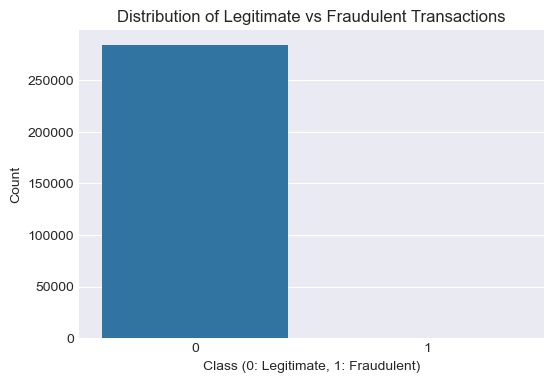

In [10]:
plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=data)
plt.title('Distribution of Legitimate vs Fraudulent Transactions')
plt.xlabel('Class (0: Legitimate, 1: Fraudulent)')
plt.ylabel('Count')
plt.show()

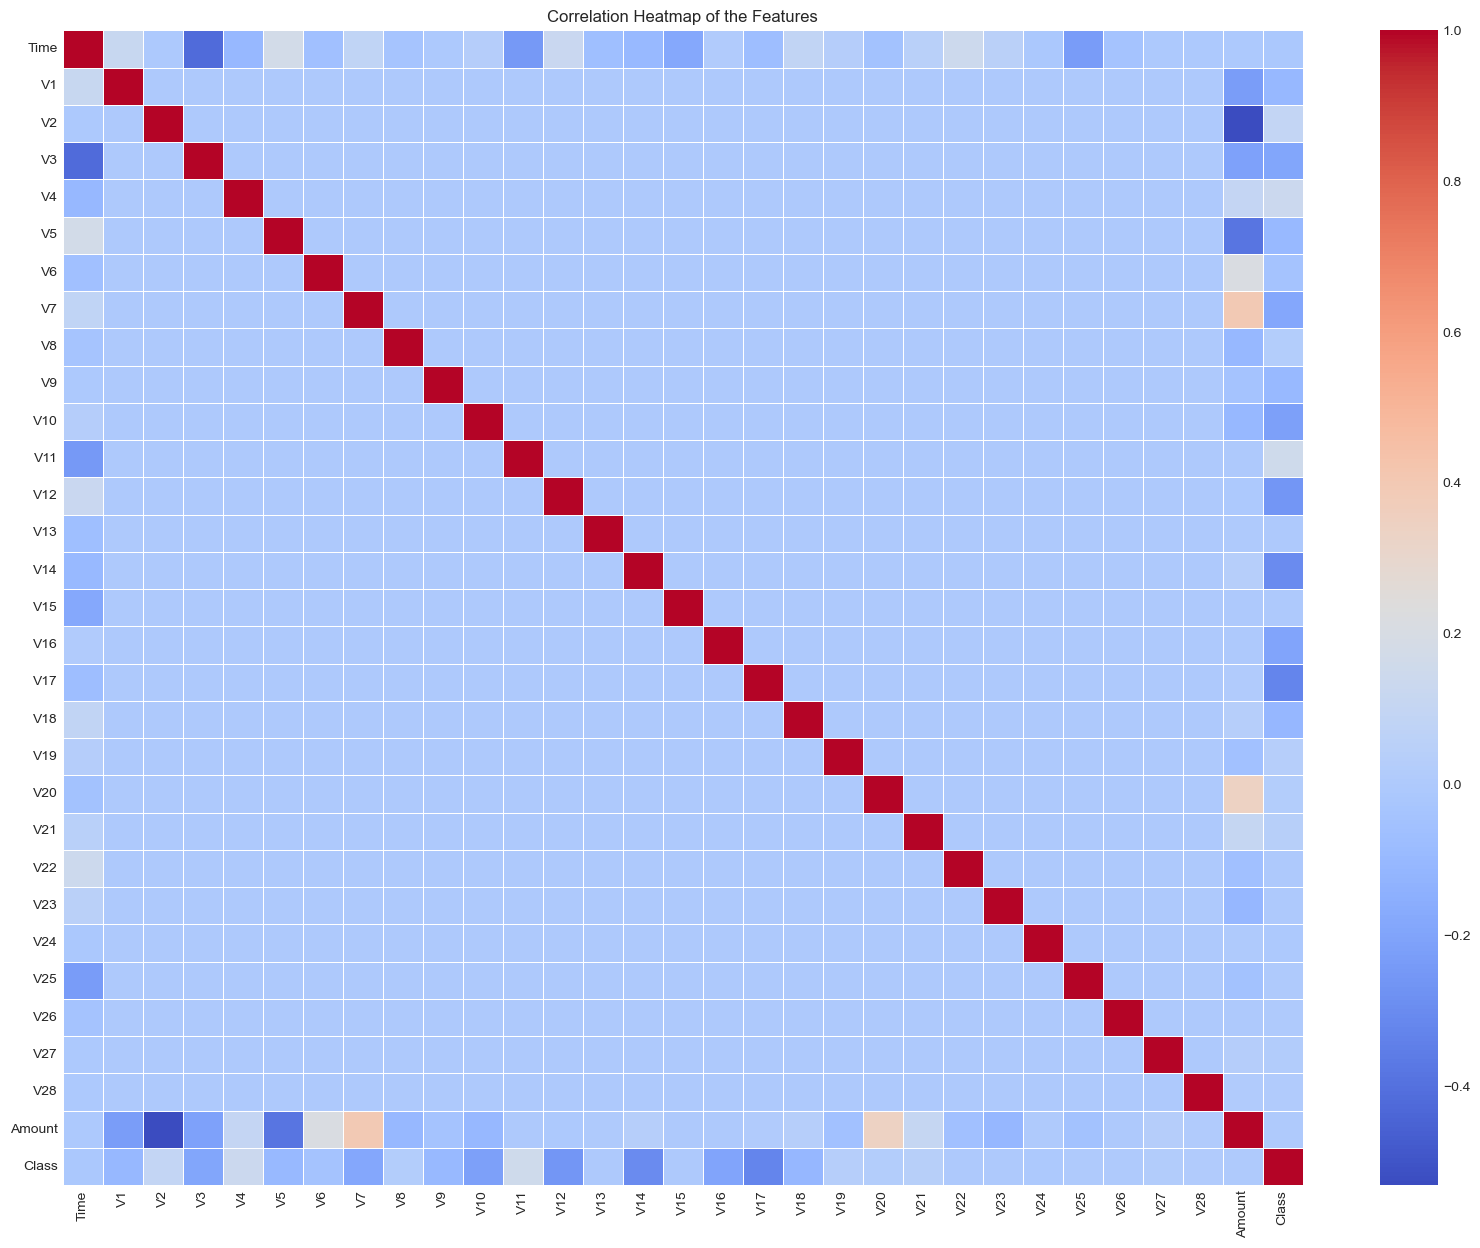

In [12]:
plt.figure(figsize=(20,15))
corr = data.corr()
sns.heatmap(corr, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of the Features')
plt.show()

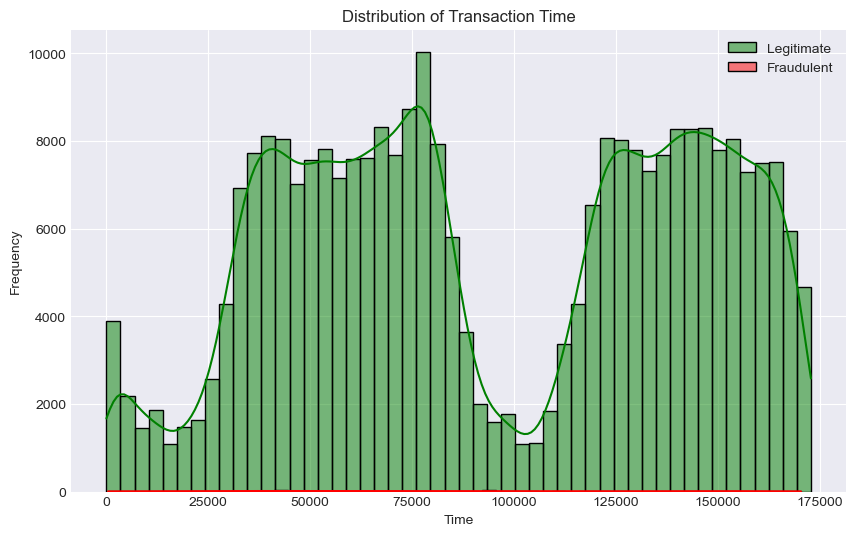

In [14]:
plt.figure(figsize=(10,6))
sns.histplot(data=data[data['Class'] == 0]['Time'], color='green', bins=50, label='Legitimate', kde=True)
sns.histplot(data=data[data['Class'] == 1]['Time'], color='red', bins=50, label='Fraudulent', kde=True)
plt.title('Distribution of Transaction Time')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.legend()
plt.show()

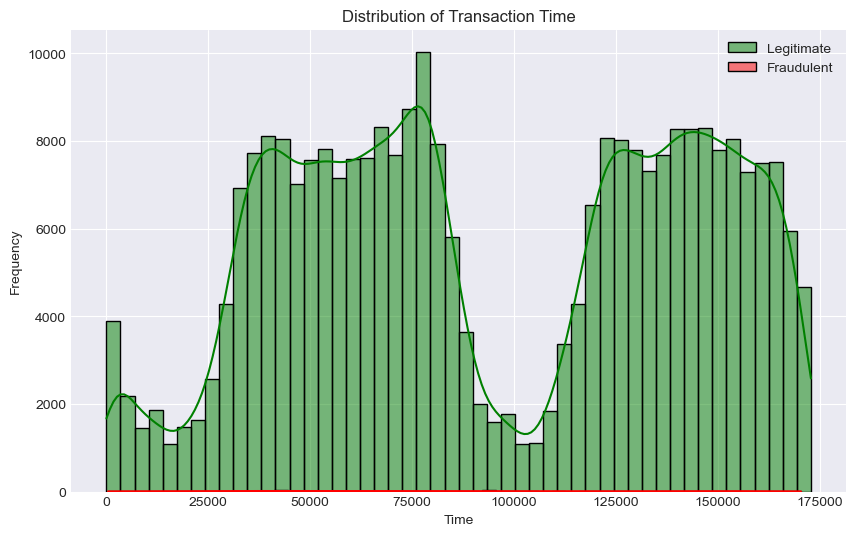

In [16]:
plt.figure(figsize=(10,6))
sns.histplot(data=data[data['Class'] == 0]['Time'], color='green', bins=50, label='Legitimate', kde=True)
sns.histplot(data=data[data['Class'] == 1]['Time'], color='red', bins=50, label='Fraudulent', kde=True)
plt.title('Distribution of Transaction Time')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.legend()
plt.show()

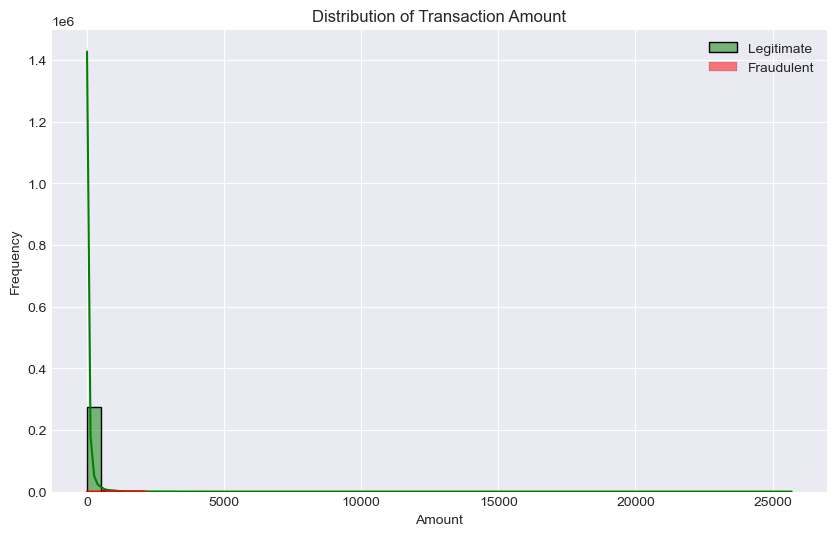

In [18]:
plt.figure(figsize=(10,6))
sns.histplot(data=data[data['Class'] == 0]['Amount'], color='green', bins=50, label='Legitimate', kde=True)
sns.histplot(data=data[data['Class'] == 1]['Amount'], color='red', bins=50, label='Fraudulent', kde=True)
plt.title('Distribution of Transaction Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.legend()
plt.show()

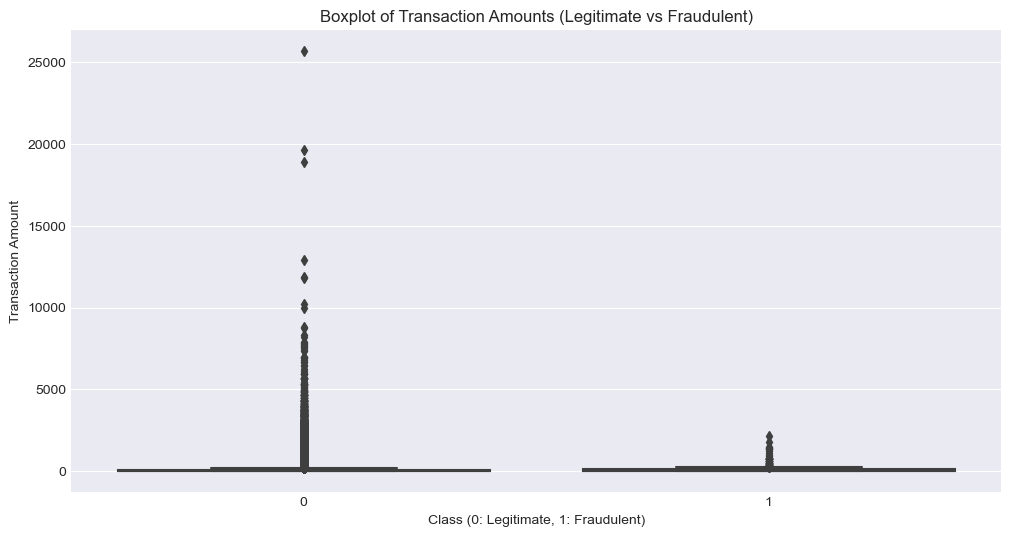

In [20]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Class', y='Amount', data=data)
plt.title('Boxplot of Transaction Amounts (Legitimate vs Fraudulent)')
plt.xlabel('Class (0: Legitimate, 1: Fraudulent)')
plt.ylabel('Transaction Amount')
plt.show()

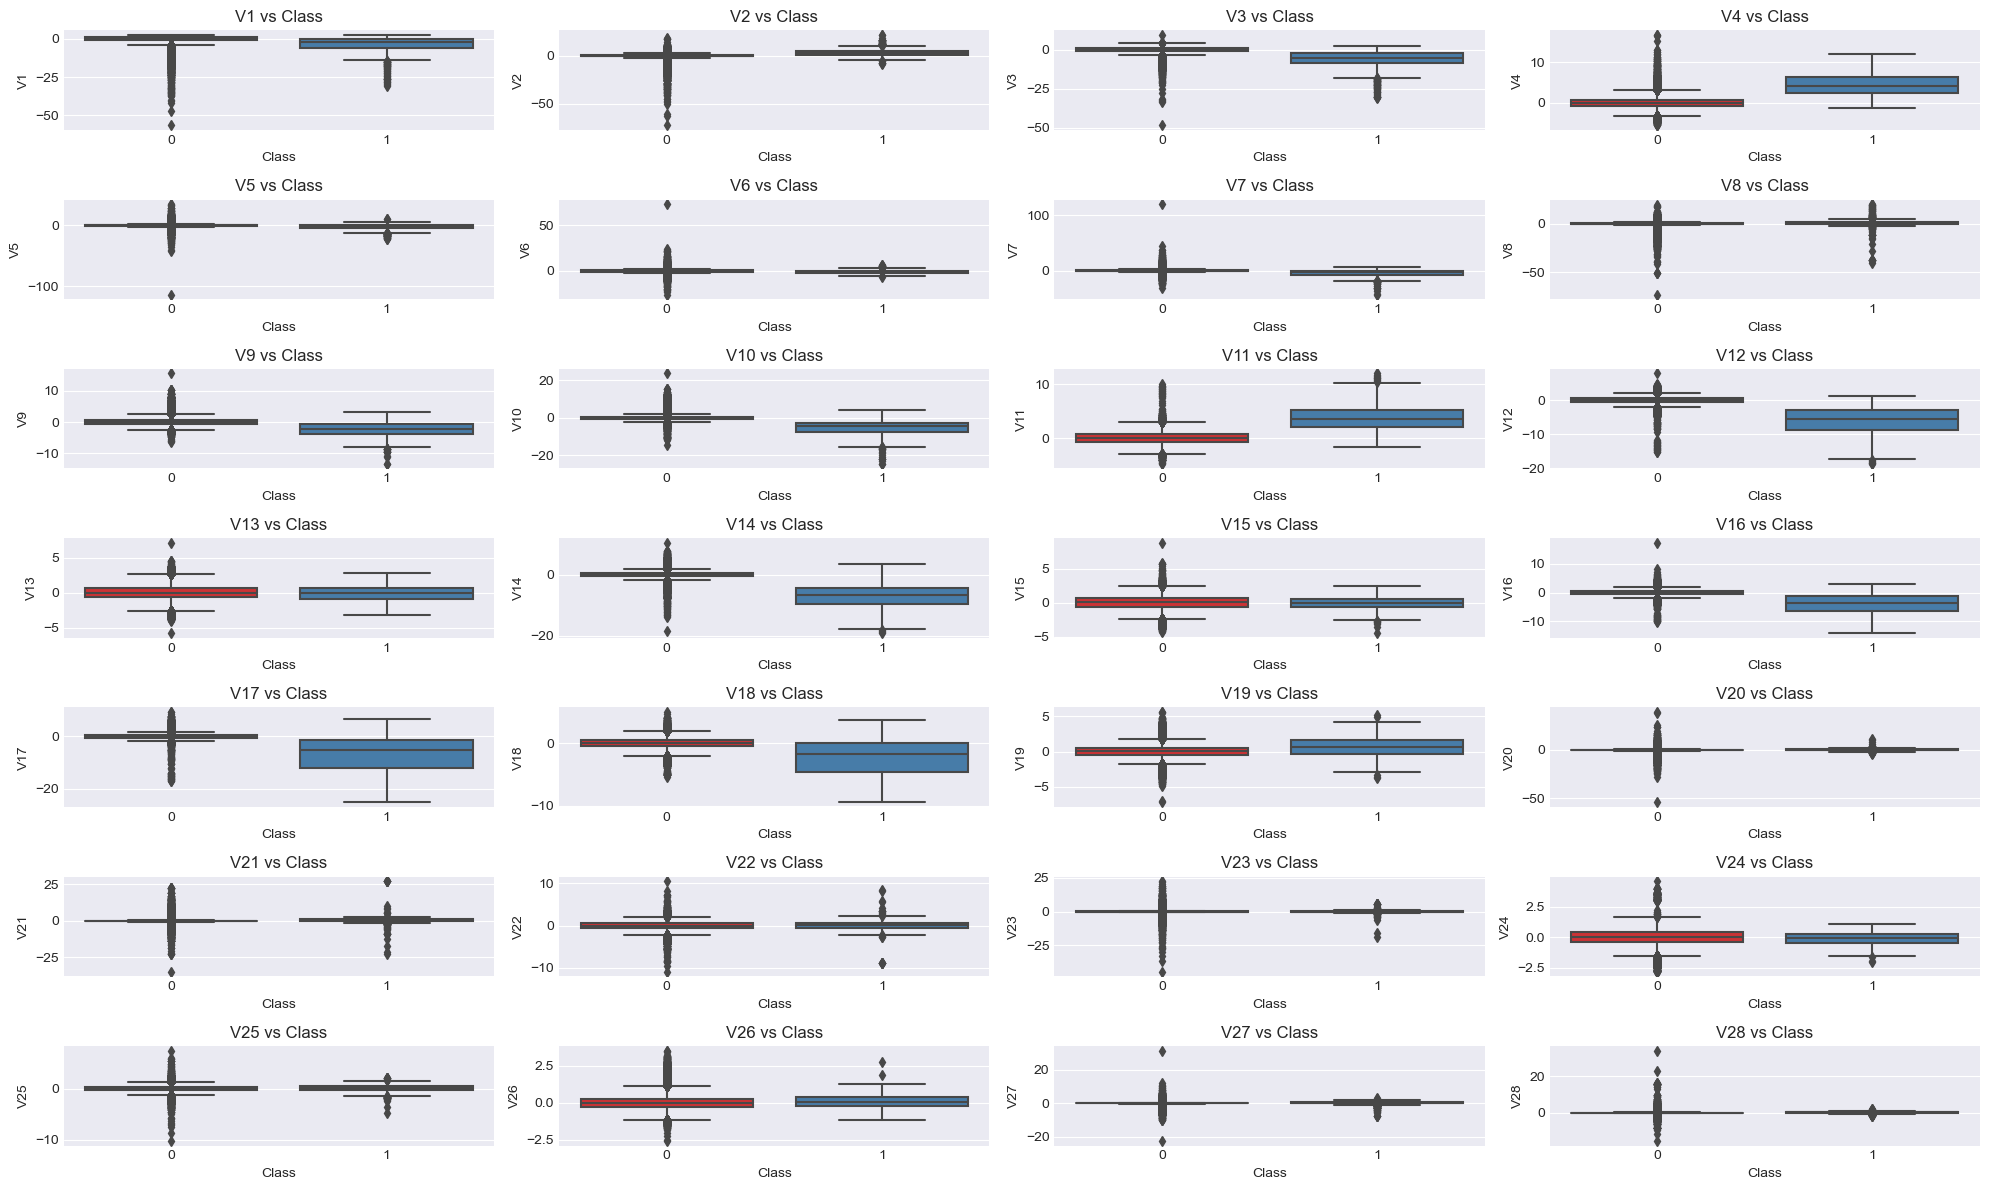

In [22]:
plt.figure(figsize=(20,12))
for i, feature in enumerate(data.columns[1:29]):
    plt.subplot(7, 4, i+1)
    sns.boxplot(x='Class', y=feature, data=data, palette="Set1")
    plt.title(f'{feature} vs Class')
    plt.tight_layout()
plt.show()

# Data After Preprocessing

In [24]:
legit = data[data.Class == 0]
fraud = data[data.Class == 1]

legit_sample = legit.sample(n=len(fraud), random_state=42)
balanced_data = pd.concat([legit_sample, fraud], axis=0)

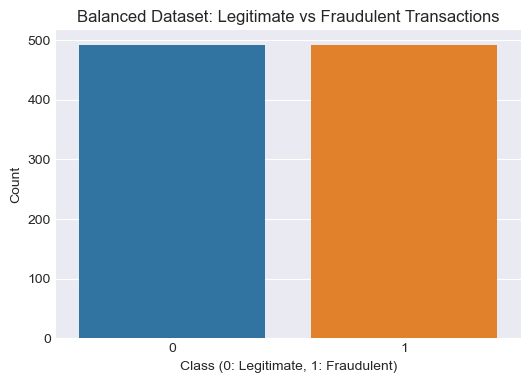

In [26]:
plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=balanced_data)
plt.title('Balanced Dataset: Legitimate vs Fraudulent Transactions')
plt.xlabel('Class (0: Legitimate, 1: Fraudulent)')
plt.ylabel('Count')
plt.show()

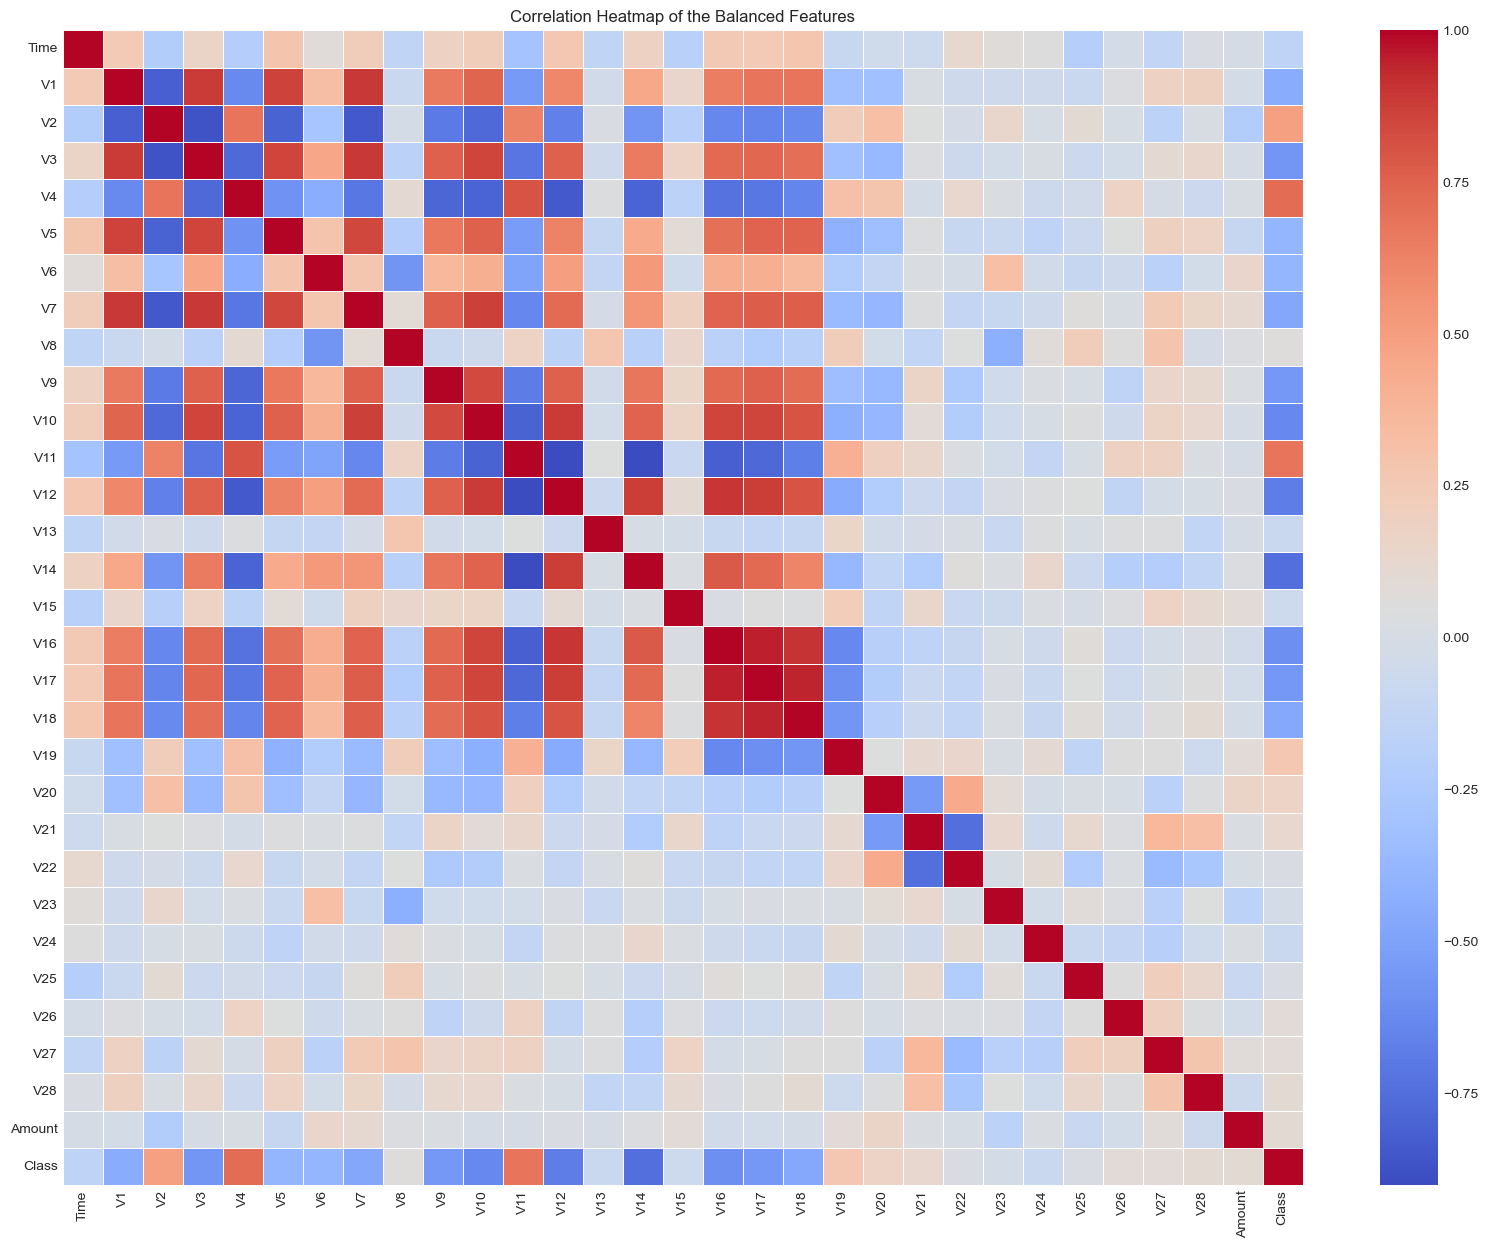

In [28]:
plt.figure(figsize=(20,15))
corr_balanced = balanced_data.corr()
sns.heatmap(corr_balanced, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of the Balanced Features')
plt.show()

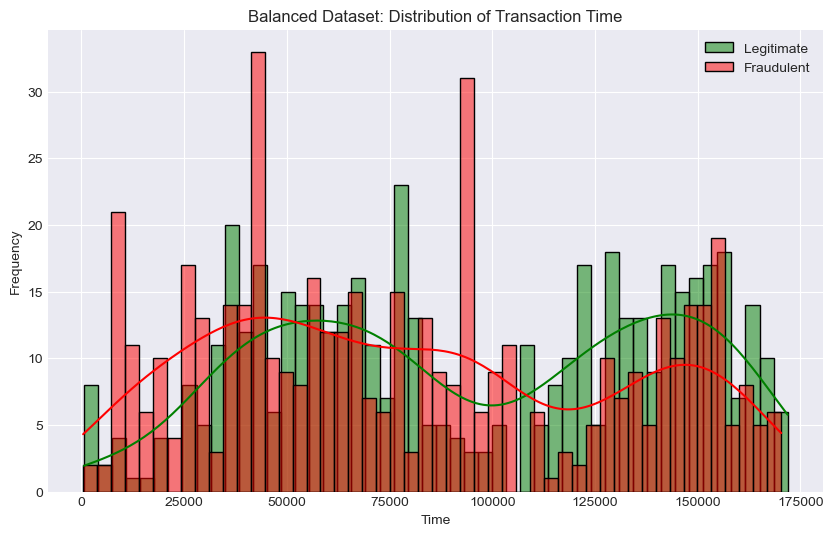

In [30]:
plt.figure(figsize=(10,6))
sns.histplot(data=balanced_data[balanced_data['Class'] == 0]['Time'], color='green', bins=50, label='Legitimate', kde=True)
sns.histplot(data=balanced_data[balanced_data['Class'] == 1]['Time'], color='red', bins=50, label='Fraudulent', kde=True)
plt.title('Balanced Dataset: Distribution of Transaction Time')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.legend()
plt.show()

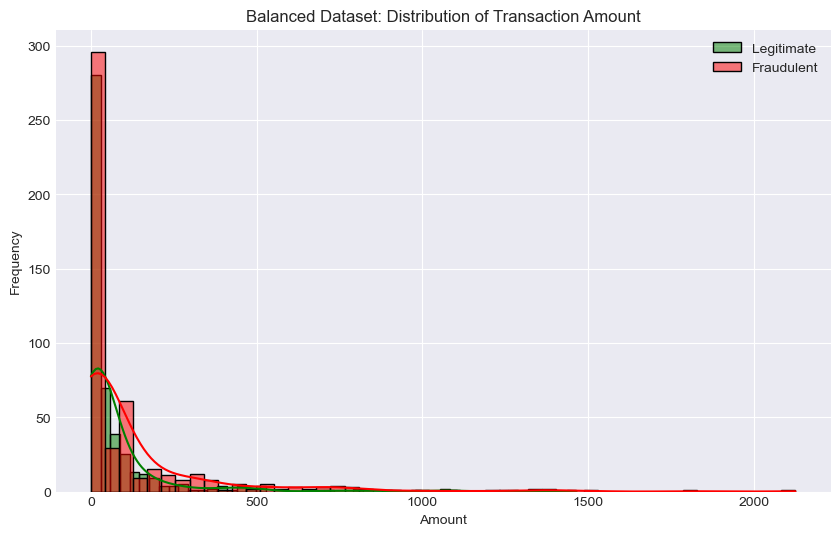

In [32]:
plt.figure(figsize=(10,6))
sns.histplot(data=balanced_data[balanced_data['Class'] == 0]['Amount'], color='green', bins=50, label='Legitimate', kde=True)
sns.histplot(data=balanced_data[balanced_data['Class'] == 1]['Amount'], color='red', bins=50, label='Fraudulent', kde=True)
plt.title('Balanced Dataset: Distribution of Transaction Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.legend()
plt.show()

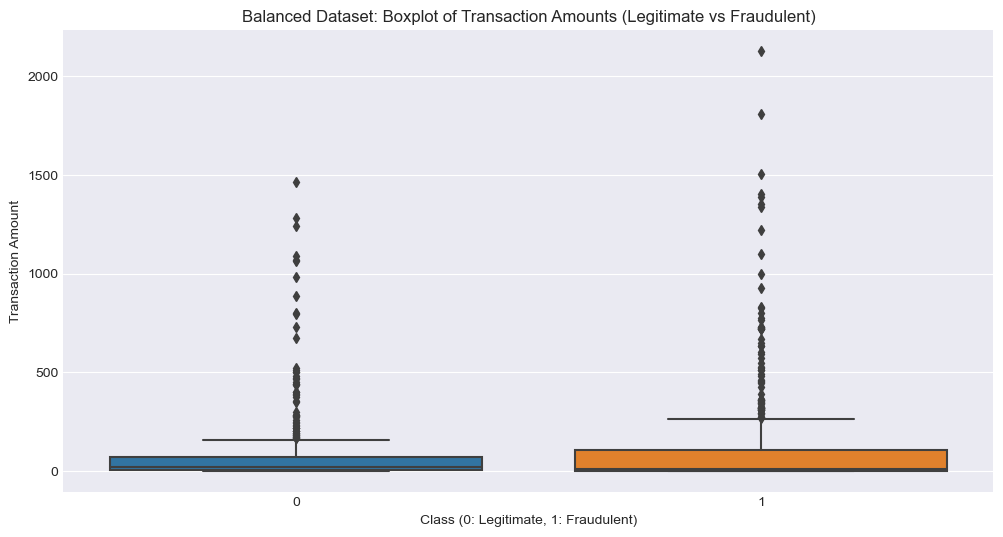

In [34]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Class', y='Amount', data=balanced_data)
plt.title('Balanced Dataset: Boxplot of Transaction Amounts (Legitimate vs Fraudulent)')
plt.xlabel('Class (0: Legitimate, 1: Fraudulent)')
plt.ylabel('Transaction Amount')
plt.show()

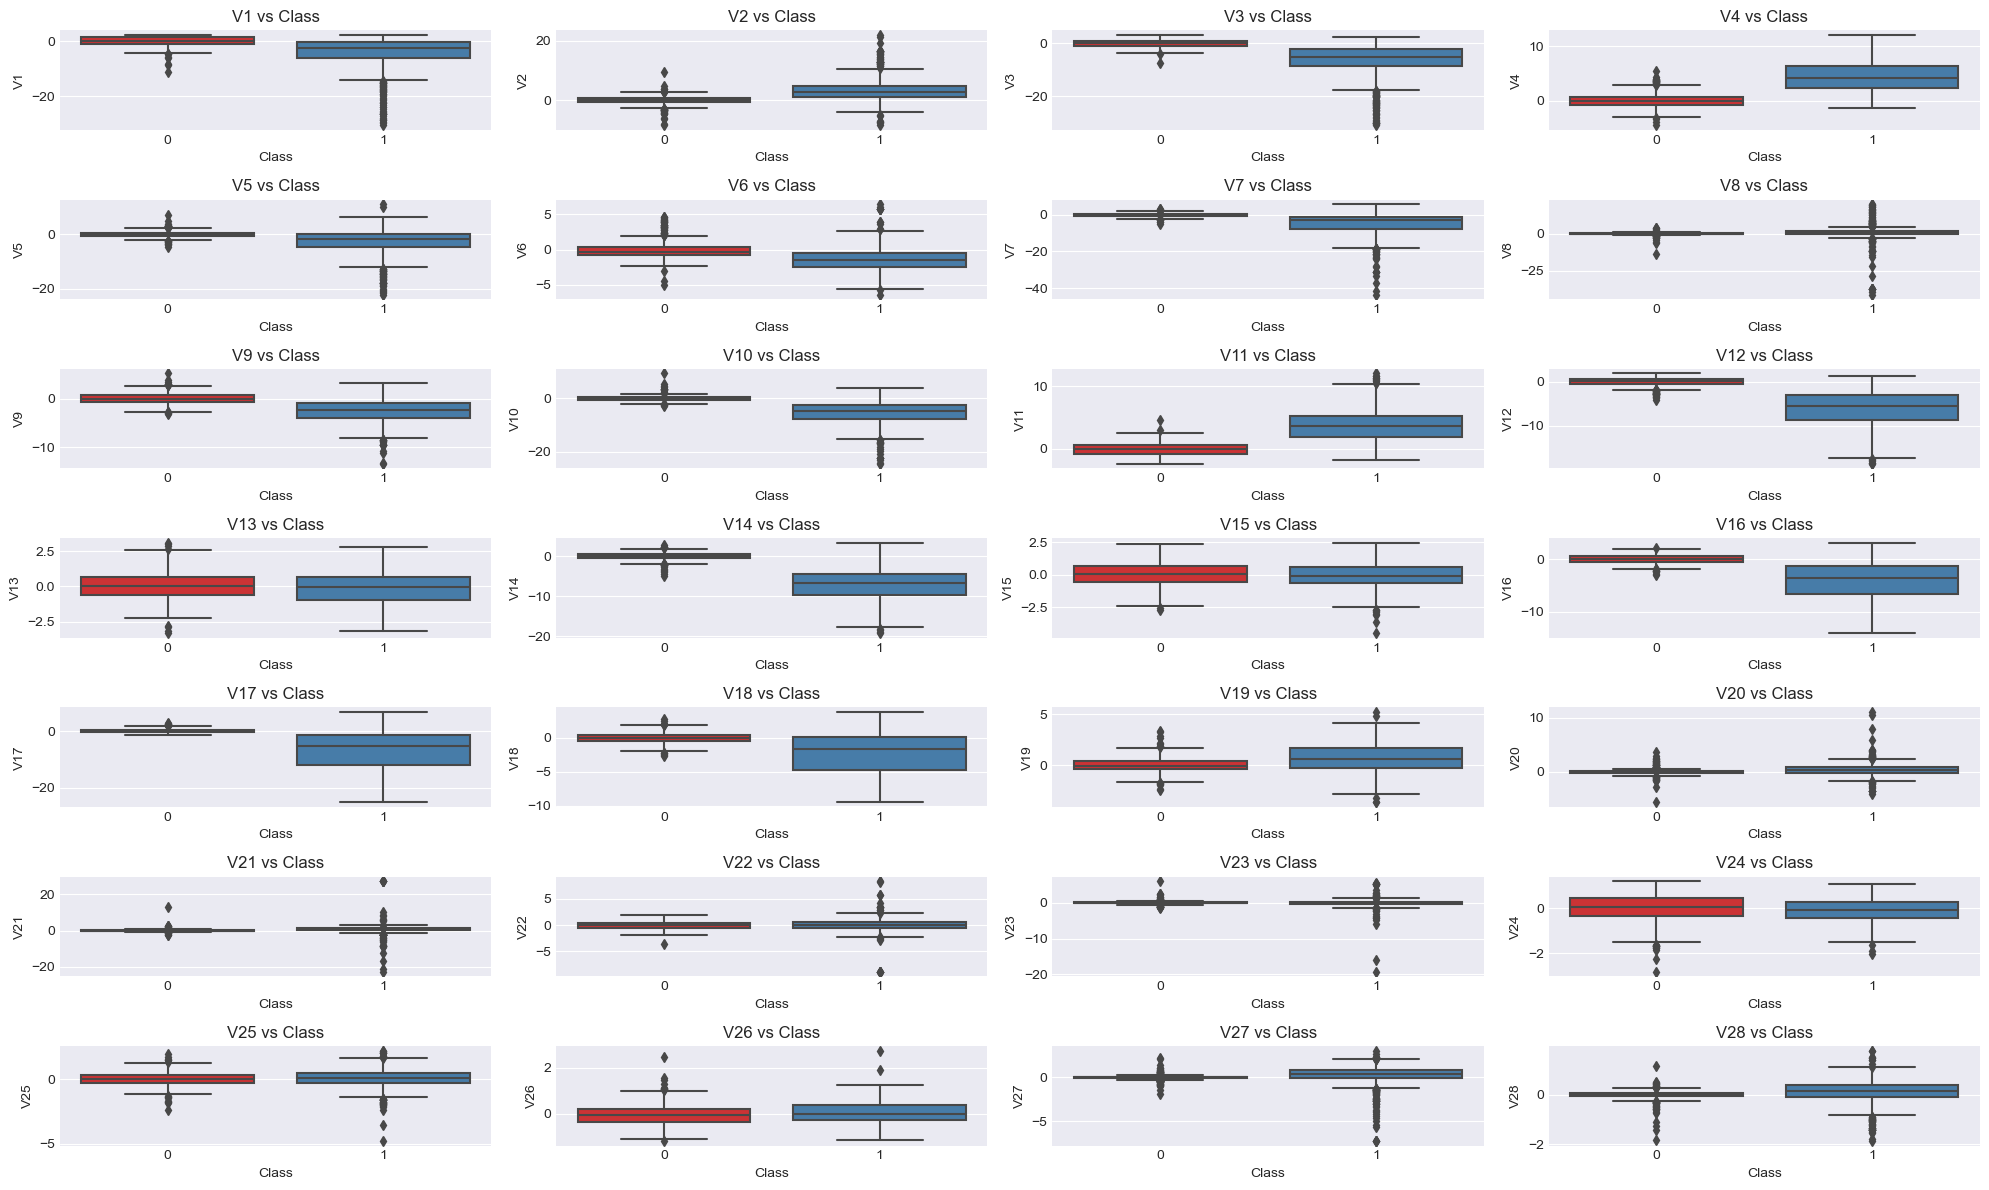

In [36]:
plt.figure(figsize=(20,12))
for i, feature in enumerate(balanced_data.columns[1:29]):
    plt.subplot(7, 4, i+1)
    sns.boxplot(x='Class', y=feature, data=balanced_data, palette="Set1")
    plt.title(f'{feature} vs Class')
    plt.tight_layout()
plt.show()